In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
mmt = pd.read_csv('data/the-movies-dataset/movies_metadata.csv')

In [4]:
mmt.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


In [6]:
mmt[mmt['video'] == True].head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
5492,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,15173,tt0298388,en,Jonah: A VeggieTales Movie,"Get ready as Bob the Tomato, Larry the Cucumbe...",...,2002-10-04,0,82.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,True,6.4,22
11469,False,"{'id': 123438, 'name': 'Loose Change Collectio...",5000,"[{'id': 99, 'name': 'Documentary'}]",http://www.loosechange911.com/,14277,tt0831315,en,Loose Change: 2nd Edition,What if...September 11th was not a surprise at...,...,2006-06-01,0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What really happened on 9/11?,Loose Change: 2nd Edition,True,6.3,16
13564,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,284117,tt1198399,en,Fitna,A short film in which Quran verses are shown a...,...,2008-03-27,0,15.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Fitna,True,1.0,1
14271,False,"{'id': 190135, 'name': 'Love Hina Collection',...",0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,44685,tt0416938,ja,ラブひな 春スペシャル ～キミサクラチルナカレ!!～,"The tests have come, and Keitaro can only hope...",...,2001-03-31,0,48.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,True,4.7,3
14608,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/familyzone/playmobil/,35148,tt1512792,en,Playmobil: The Secret of Pirate Island,"Ahoy, matey! Your Favorite Playmobil toys have...",...,2009-10-13,0,140.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Playmobil: The Secret of Pirate Island,True,0.0,0


In [4]:
mmt.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546300e+04,45463.000000,45463.000000,4.546300e+04,45206.000000,45463.000000,45463.000000
mean,4.224579e+06,108359.918813,2.921378,1.120861e+07,94.127572,5.618217,109.890856
std,1.742413e+07,112460.749278,6.005234,6.433019e+07,38.406803,1.924174,491.294816
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26449.500000,0.385945,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,60003.000000,1.127757,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157328.000000,3.678588,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.000000,547.488298,2.787965e+09,1256.000000,10.000000,14075.000000


In [5]:
mmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45463 entries, 0 to 45462
Data columns (total 24 columns):
adult                    45463 non-null bool
belongs_to_collection    4491 non-null object
budget                   45463 non-null int64
genres                   45463 non-null object
homepage                 7779 non-null object
id                       45463 non-null int64
imdb_id                  45446 non-null object
original_language        45452 non-null object
original_title           45463 non-null object
overview                 44509 non-null object
popularity               45463 non-null float64
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45463 non-null int64
runtime                  45206 non-null float64
spoken_languages         45463 non-null object
status                   45382 non-null object
tag

** 'adult'** - niewiele wartości 'True', więc usuwam je i pozbywam się tej kolumny

In [6]:
print("Liczba wartości 'adult' == False : {}.".format(len(mmt[mmt['adult'] == 0])))
print("Liczba wartości 'adult' == True : {}.".format(len(mmt[mmt['adult'] != 0])))

Liczba wartości 'adult' == False : 45454.
Liczba wartości 'adult' == True : 9.


In [7]:
mmt.drop(mmt[mmt['adult'] != False].index, axis=0, inplace = True)

In [8]:
mmt.drop('adult', axis=1, inplace=True)

**  'belongs_to_collection' **- wiele wartości null, zamieniam je na 0 na razie

In [9]:
len(mmt[mmt['belongs_to_collection'].isna() == True])

40963

In [47]:
mmt['belongs_to_collection'].fillna(0, inplace=True) 

** 'budget'** - tylko 8889 wartości jest niezerowa...

In [11]:
pd.to_numeric(mmt['budget'])
print("Liczba wartości 'budget' == 0: {}.".format(len(mmt[mmt['budget'] == 0])))
print("Liczba wartości 'budget' != 0: {}.".format(len(mmt[mmt['budget'] != 0])))

Liczba wartości 'budget' == 0: 36565.
Liczba wartości 'budget' != 0: 8889.


In [12]:
mmt.drop(mmt[mmt['budget'] == 0].index, axis=0, inplace = True)

In [13]:
mmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8889 entries, 0 to 45419
Data columns (total 23 columns):
belongs_to_collection    8889 non-null object
budget                   8889 non-null int64
genres                   8889 non-null object
homepage                 2755 non-null object
id                       8889 non-null int64
imdb_id                  8887 non-null object
original_language        8889 non-null object
original_title           8889 non-null object
overview                 8842 non-null object
popularity               8889 non-null float64
poster_path              8882 non-null object
production_companies     8889 non-null object
production_countries     8889 non-null object
release_date             8885 non-null object
revenue                  8889 non-null int64
runtime                  8879 non-null float64
spoken_languages         8889 non-null object
status                   8886 non-null object
tagline                  6683 non-null object
title              

**  'genres' **- nie ma wartości null

In [14]:
len(mmt[mmt['genres'].isna() == True])

0

** 'original_language' **- posiada niewiele wartości null

In [15]:
len(mmt[mmt['original_language'].isna() == True])

0

In [16]:
mmt['original_language'].unique()

array(['en', 'fr', 'nl', 'cn', 'ru', 'es', 'zh', 'sv', 'sr', 'it', 'de',
       'ja', 'no', 'fa', 'pt', 'da', 'xx', 'bs', 'cs', 'ko', 'el', 'hi',
       'pl', 'ps', 'fi', 'ro', 'hu', 'he', 'af', 'th', 'bo', 'la', 'vi',
       'ca', 'bm', 'tr', 'ta', 'bg', 'nb', 'id', 'lv', 'ku', 'ml', 'lo',
       'ar', 'kn', 'is', 'sl', 'et', 'mr', 'sq', 'te', 'uk', 'ur'],
      dtype=object)

** 'popularity' ** - istnieje kilka wartości 0, niestety na ten moment nie wiem co dokładnie oznacza ta zmienna i czy wartość 0 jest poprawna

In [17]:
print("Liczba wartości 'popularity' == 0 : {}.".format(len(mmt[mmt['popularity'] == 0])))

Liczba wartości 'popularity' == 0 : 2.


In [18]:
print("Min value of 'popularity' {}.".format(min(mmt['popularity'])))
print("Max value of 'popularity' {}.".format(max(mmt['popularity'])))

Min value of 'popularity' 0.0.
Max value of 'popularity' 547.4882980000001.


** 'status'** - niewiele wartości jest inna od 'Released', po za tym niewiele wnoszą nam filmy, które nie zostały wydane. Zatem usuwam te wartości, a następnie usuwam tą kolumnę

In [19]:
mmt['status'].unique()

array(['Released', 'Rumored', 'Post Production', nan], dtype=object)

In [20]:
len(mmt[mmt['status'] != 'Released'])

25

In [21]:
mmt.drop(mmt[mmt['status'] != 'Released'].index, axis=0, inplace = True)

In [22]:
mmt.drop('status', axis=1, inplace=True)

**  'release_date'** istnieje kilka wartości null

In [23]:
len(mmt[mmt['release_date'].isna() == True])

4

In [24]:
mmt.drop(mmt[mmt['release_date'].isna()].index, axis=0, inplace = True)

In [25]:
mmt.drop(mmt[mmt['release_date'] < '1950-01-01'].index, axis=0, inplace = True)

In [26]:
mmt['release_date'] = pd.to_datetime(mmt['release_date'], format='%Y-%m-%d')
print(max(mmt['release_date']))
print(min(mmt['release_date']))

2017-10-27 00:00:00
1950-03-04 00:00:00


(array([ 13.,  13.,  22.,  27.,  24.,  16.,  25.,  24.,  20.,  35.,  31.,
         29.,  37.,  41.,  41.,  52.,  49.,  43.,  44.,  49.,  54.,  59.,
         73.,  91.,  79., 101., 110., 103., 124., 131., 127., 129., 162.,
        189., 191., 232., 253., 270., 319., 314., 347., 468., 484., 509.,
        582., 572., 579., 525., 491., 324.]),
 array([711920.  , 712414.18, 712908.36, 713402.54, 713896.72, 714390.9 ,
        714885.08, 715379.26, 715873.44, 716367.62, 716861.8 , 717355.98,
        717850.16, 718344.34, 718838.52, 719332.7 , 719826.88, 720321.06,
        720815.24, 721309.42, 721803.6 , 722297.78, 722791.96, 723286.14,
        723780.32, 724274.5 , 724768.68, 725262.86, 725757.04, 726251.22,
        726745.4 , 727239.58, 727733.76, 728227.94, 728722.12, 729216.3 ,
        729710.48, 730204.66, 730698.84, 731193.02, 731687.2 , 732181.38,
        732675.56, 733169.74, 733663.92, 734158.1 , 734652.28, 735146.46,
        735640.64, 736134.82, 736629.  ]),
 <a list of 50 Patch ob

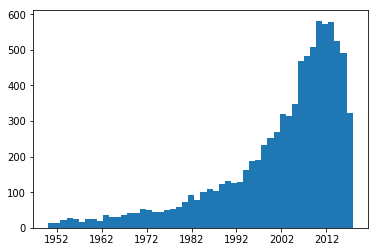

In [27]:
plt.hist(mmt['release_date'].dropna(), bins=50)

In [28]:
mmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8627 entries, 0 to 45419
Data columns (total 22 columns):
belongs_to_collection    8627 non-null object
budget                   8627 non-null int64
genres                   8627 non-null object
homepage                 2739 non-null object
id                       8627 non-null int64
imdb_id                  8626 non-null object
original_language        8627 non-null object
original_title           8627 non-null object
overview                 8581 non-null object
popularity               8627 non-null float64
poster_path              8623 non-null object
production_companies     8627 non-null object
production_countries     8627 non-null object
release_date             8627 non-null datetime64[ns]
revenue                  8627 non-null int64
runtime                  8617 non-null float64
spoken_languages         8627 non-null object
tagline                  6521 non-null object
title                    8627 non-null object
video      

** 'revenue' **- tylko 7408 wartości nie zawiera 0...

In [29]:
print("Liczba wartości 'revenue' == 0: {}.".format(len(mmt[mmt['revenue'] == 0])))
print("Liczba wartości 'revenue' != 0: {}.".format(len(mmt[mmt['revenue'] != 0])))

Liczba wartości 'revenue' == 0: 3354.
Liczba wartości 'revenue' != 0: 5273.


In [30]:
mmt.drop(mmt[mmt['revenue'] == 0].index, axis=0, inplace = True)

** 'runtime' ** - istnieją wartości null- na razie zamienię je na 0. Wartości 0 są na pewno nieprawidłowe i należy się nimi zająć (średnia, mediana, usunięcie). Również jest sporo wysokich wartości odstających, które może są prawdziwe (miniseriale się tu znalazły..), więc część z nich można by usunąć.

In [31]:
len(mmt[mmt['runtime'].isna() == True])

1

In [32]:
mmt['runtime'].fillna(0, inplace=True) 

In [33]:
print(max(mmt['runtime']))
print(min(mmt['runtime']))

338.0
0.0


In [34]:
print("Liczba wartości zerowych cechy 'runtime': {}.".format(len(mmt[mmt['runtime'] == 0])))

Liczba wartości zerowych cechy 'runtime': 12.


In [35]:
mmt.drop(mmt[mmt['runtime'] == 0].index, axis=0, inplace = True)

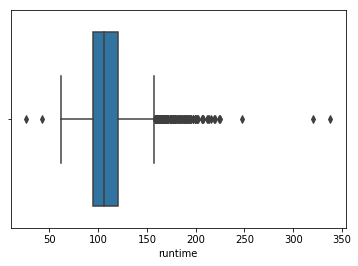

In [36]:
sns.boxplot(mmt['runtime'])

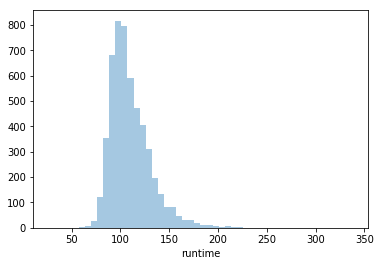

In [37]:
sns.distplot(mmt['runtime'], kde=False)

** 'vote_average' ** oraz ** 'vote_count'** pochodzą z serwisu tmdb. Jednak takie informacje chciałam pobrać z imdb. Usuwam te kolumny.

In [38]:
print(len(mmt[mmt['vote_average'] == 0]))
print(max(mmt['vote_average']))
print(min(mmt['vote_average']))

7
9.1
0.0


In [39]:
print(len(mmt[mmt['vote_count'] == 0]))
print(max(mmt['vote_count']))
print(min(mmt['vote_count']))


7
14075
0


In [40]:
mmt.drop('vote_average', axis=1, inplace=True)
mmt.drop('vote_count', axis=1, inplace=True)

#### Dodaję nowe eksperymentalne kolmuny: words_in_title, words_in_original_title

In [41]:
mmt['words_in_title']  = mmt['title'].str.lower().str.split().apply(len)
mmt['words_in_original_title']  = mmt['original_title'].str.lower().str.split().apply(len)

#### Cechy, które niewiele wniosą, dlatego usuwam

In [42]:
mmt.drop('homepage', axis=1, inplace=True)
mmt.drop('id', axis=1, inplace=True)
mmt.drop('original_title', axis=1, inplace=True)
mmt.drop('overview', axis=1, inplace=True)
mmt.drop('poster_path', axis=1, inplace=True)
mmt.drop('tagline', axis=1, inplace=True)
mmt.drop('title', axis=1, inplace=True)
mmt.drop('video', axis=1, inplace=True)

Jak widać poniżej wartości null zawiera tylko zmienna 'imdb_id', która będzie potrzebna do wyciągnięcia danych z imdb. Usunę te watrtości.

In [43]:
mmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5261 entries, 0 to 45419
Data columns (total 14 columns):
belongs_to_collection      5261 non-null object
budget                     5261 non-null int64
genres                     5261 non-null object
imdb_id                    5261 non-null object
original_language          5261 non-null object
popularity                 5261 non-null float64
production_companies       5261 non-null object
production_countries       5261 non-null object
release_date               5261 non-null datetime64[ns]
revenue                    5261 non-null int64
runtime                    5261 non-null float64
spoken_languages           5261 non-null object
words_in_title             5261 non-null int64
words_in_original_title    5261 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 616.5+ KB


In [44]:
mmt.drop(mmt[mmt['imdb_id'].isna()].index, axis=0, inplace = True)
mmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5261 entries, 0 to 45419
Data columns (total 14 columns):
belongs_to_collection      5261 non-null object
budget                     5261 non-null int64
genres                     5261 non-null object
imdb_id                    5261 non-null object
original_language          5261 non-null object
popularity                 5261 non-null float64
production_companies       5261 non-null object
production_countries       5261 non-null object
release_date               5261 non-null datetime64[ns]
revenue                    5261 non-null int64
runtime                    5261 non-null float64
spoken_languages           5261 non-null object
words_in_title             5261 non-null int64
words_in_original_title    5261 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 616.5+ KB


In [45]:
mmt.head()

,belongs_to_collection,budget,genres,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,words_in_title,words_in_original_title
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",2,2
1,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",1,1
3,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",3,3
5,0,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",tt0113277,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",1,1
8,0,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",tt0114576,en,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",2,2


In [48]:
mmt.to_csv('data/mmt_initial_preparation.csv', index=False)